In [107]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine 
import missingno as msno
from zipfile import ZipFile
import sys
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Extract CSVs into DataFrames

In [108]:
customers_file = "resources/customers.csv"
customers_df = pd.read_csv(customers_file)
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [109]:
#checking duplicate row 
customers_df.duplicated().sum()

0

In [110]:
#checking number of null columns
customers_df.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

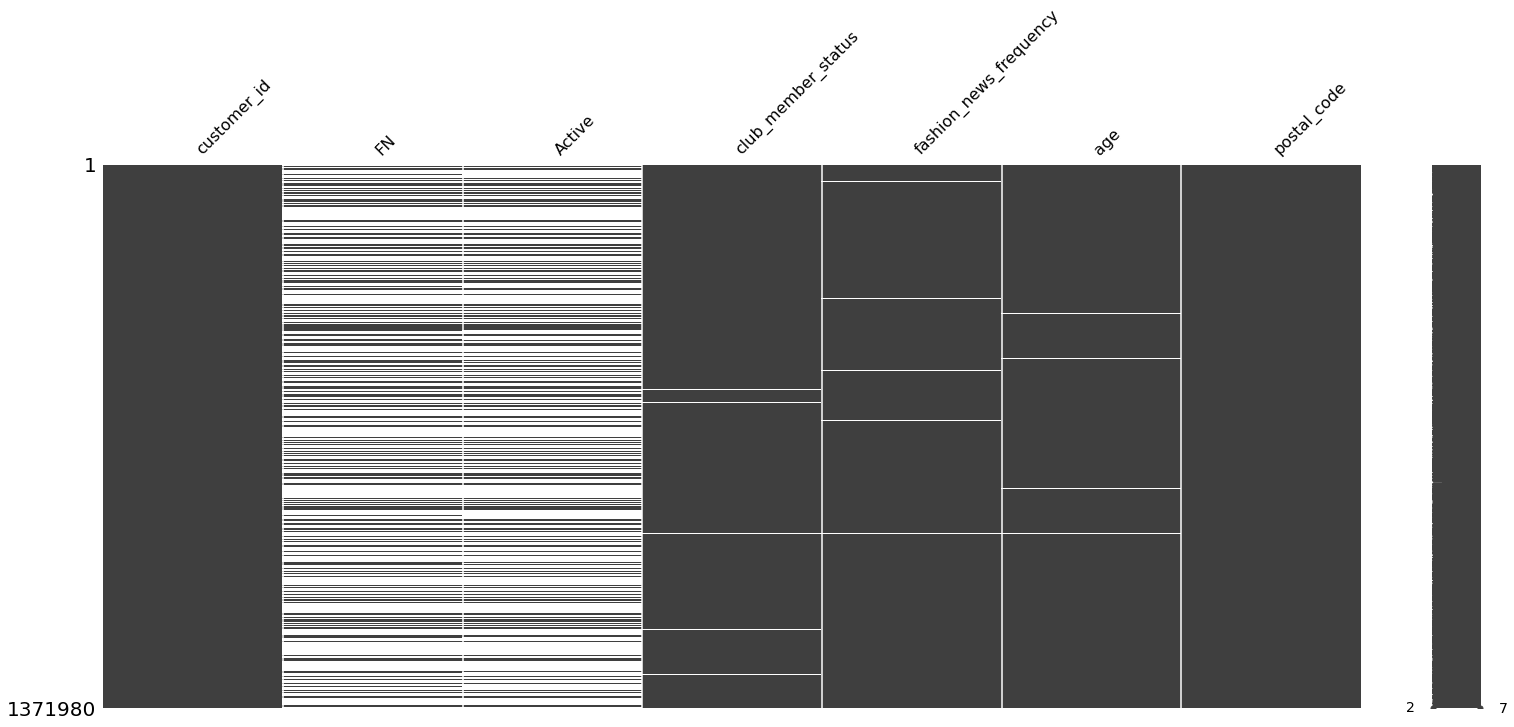

In [111]:
msno.matrix(customers_df)

In [112]:
#converting customer_id to int type
def id_inting(x):
    return int(x[-16:],16)

In [113]:
#converting customer_id to int type
print(f'number of uunique customer_id before converting {customers_df["customer_id"].nunique()}')
customers_df['customer_id']= customers_df['customer_id'].apply(id_inting)
print(f'number of uunique customer_id after converting {customers_df["customer_id"].nunique()}')

number of uunique customer_id before converting 1371980
number of uunique customer_id after converting 1371980


In [114]:
#converting postal_code to int type
print(f'number of uunique postal_code before converting {customers_df["postal_code"].nunique()}')
customers_df['postal_code']= customers_df['postal_code'].apply(id_inting)
print(f'number of uunique postal_code after converting {customers_df["postal_code"].nunique()}')

number of uunique postal_code before converting 352899
number of uunique postal_code after converting 352899


In [115]:
#Fill null value of FN column
print(f"The unique values before imputing in FN column: {customers_df['FN'].unique()}")
customers_df['FN'].fillna(0.0 ,inplace=True)
customers_df["FN"].replace("Not_interested",0.0,inplace=True)
print(f"The unique values after imputing in FN column: {customers_df['FN'].unique()}")

The unique values before imputing in FN column: [nan  1.]
The unique values after imputing in FN column: [0. 1.]


In [116]:
#Fill null value of Active column
print(f"The unique values before imputing in Active column: {customers_df['Active'].unique()}")
customers_df['Active'].fillna(0.0 ,inplace=True)
customers_df["Active"].replace("Not_interested",0.0,inplace=True)
print(f"The unique values after imputing in Active column : {customers_df['Active'].unique()}")

The unique values before imputing in Active column: [nan  1.]
The unique values after imputing in Active column : [0. 1.]


In [117]:
# Keeping The row with 5 or more valid data and drop others
customers_df.dropna(axis=0, how='any',inplace=True)

In [118]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338570 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1338570 non-null  uint64 
 1   FN                      1338570 non-null  float64
 2   Active                  1338570 non-null  float64
 3   club_member_status      1338570 non-null  object 
 4   fashion_news_frequency  1338570 non-null  object 
 5   age                     1338570 non-null  float64
 6   postal_code             1338570 non-null  uint64 
dtypes: float64(3), object(2), uint64(2)
memory usage: 81.7+ MB


In [119]:
#Fill null value of fashion_news_frequency column
print(f"The unique values before imputing in fashion_news_frequency column: {customers_df['fashion_news_frequency'].unique()}")
customers_df["fashion_news_frequency"].replace("NONE","None",inplace=True)
print(f"The unique values after imputing in fashion_news_frequency column: {customers_df['fashion_news_frequency'].unique()}")

The unique values before imputing in fashion_news_frequency column: ['NONE' 'Regularly' 'Monthly' 'None']
The unique values after imputing in fashion_news_frequency column: ['None' 'Regularly' 'Monthly']


In [120]:
#checking number of null columns
customers_df.isna().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

In [121]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338570 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1338570 non-null  uint64 
 1   FN                      1338570 non-null  float64
 2   Active                  1338570 non-null  float64
 3   club_member_status      1338570 non-null  object 
 4   fashion_news_frequency  1338570 non-null  object 
 5   age                     1338570 non-null  float64
 6   postal_code             1338570 non-null  uint64 
dtypes: float64(3), object(2), uint64(2)
memory usage: 81.7+ MB


In [123]:
transactions_file = "resources/transactions_train.csv"
transactions_df = pd.read_csv(transactions_file)
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [124]:
#changing the t_dat column to datetime format
transactions_df["t_dat"]=pd.to_datetime(transactions_df["t_dat"])
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [125]:
#checking number of null columns
transactions_df.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [126]:
#converting customer_id to int type
print(f'number of uunique customer_id before converting {transactions_df["customer_id"].nunique()}')
transactions_df['customer_id']= transactions_df['customer_id'].apply(id_inting)
print(f'number of uunique customer_id after converting {transactions_df["customer_id"].nunique()}')

number of uunique customer_id before converting 1362281
number of uunique customer_id after converting 1362281


In [127]:
transactions_customer_df=pd.merge(transactions_df,customers_df,on="customer_id",how='inner')

In [129]:
transactions_customer_df.to_csv("outputs/transactions_customer.csv",index=False)


In [130]:
transactions_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31471572 entries, 0 to 31471571
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   t_dat                   datetime64[ns]
 1   customer_id             uint64        
 2   article_id              int64         
 3   price                   float64       
 4   sales_channel_id        int64         
 5   FN                      float64       
 6   Active                  float64       
 7   club_member_status      object        
 8   fashion_news_frequency  object        
 9   age                     float64       
 10  postal_code             uint64        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2), uint64(2)
memory usage: 2.8+ GB


In [131]:
#checking number of null columns
transactions_customer_df.isna().sum()

t_dat                     0
customer_id               0
article_id                0
price                     0
sales_channel_id          0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

In [132]:
article_file = "resources/articles.csv"
article_df = pd.read_csv(article_file)
article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [133]:
#checking number of null columns
article_df.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [134]:
#checking duplicate row 
article_df.duplicated().sum()


0

In [135]:
article_df.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [136]:
article_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [137]:
#droping the unnecessary column that shows the category numbers
article_df.drop(['product_code', 'product_type_no','graphical_appearance_no','colour_group_code',
'perceived_colour_value_id','perceived_colour_master_id','department_no','index_code','index_group_no',
'section_no','garment_group_no','detail_desc'], axis=1,inplace=True)

In [138]:
article_df.head(2)

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic


In [139]:
transactions_article_df=pd.merge(transactions_df,article_df,on="article_id",how='inner')

In [140]:
transactions_article_df.to_csv("outputs/transactions_article.csv",index=False)


In [141]:
#reading ApI csv files
women_df = pd.read_csv("outputs/women_article_df.csv")
men_df = pd.read_csv("outputs/men_article_df.csv")
baby_df = pd.read_csv("outputs/baby_article_df.csv")
kids_df = pd.read_csv("outputs/kids_article.csv")


kids_df


,articleCode,title,category,price($)
0,1058174007,2-piece Printed Set,kids_girls_clothing_topstshirts_tshirts,24.99
1,1058174003,2-piece Printed Set,kids_girls_clothing_topstshirts_tshirts,24.99
2,1058174002,2-piece Printed Set,kids_girls_clothing_topstshirts_tshirts,24.99
3,1035221001,2-piece Set,kids_girls_setsoutfits,24.99
4,1021186003,2-piece Cotton Set,kids_boys_setsoutfits,24.99
...,...,...,...,...
3128,1037853001,2-piece Cotton Set,kids_girls_setsoutfits,24.99
3129,840505013,Hooded Jacket,kids_girls_clothing_jumperssweatshirts_hoodies,14.99
3130,758485002,2-pack Sports Tights,kids_girls_sportswear,29.99
3131,943831002,2-piece Set,kids_girls_clothing_jumperssweatshirts_hoodies,24.99


In [142]:
frames = [women_df, men_df, baby_df,kids_df]

API_data = pd.concat(frames)

In [143]:
#dropping category column 
API_data.drop('category',axis=1, inplace=True)
#renaming columns
API_data.columns=["article_id","title","price"]
API_data

,article_id,title,price
0,963087001,Wide-leg Twill Pants,17.99
1,963087016,Wide-leg Twill Pants,17.99
2,939703036,V-neck Blouse,17.99
3,895610022,Dress Pants,34.99
4,751471042,Slacks,19.99
...,...,...,...
3128,1037853001,2-piece Cotton Set,24.99
3129,840505013,Hooded Jacket,14.99
3130,758485002,2-pack Sports Tights,29.99
3131,943831002,2-piece Set,24.99


In [144]:
#checking duplicate value
API_data.duplicated().sum()

38

In [145]:
#Dropping duplicate value
API_data.drop_duplicates(inplace=True)

In [146]:
API_data=API_data.sort_values(by='article_id')
API_data.tail()

,article_id,title,price
1629,1088926002,Twill Utility Pants,34.99
3972,1089732001,Oversized Hoodie,34.99
4356,1089732002,Oversized Hoodie,34.99
514,1091778001,Eyelet Embroidery Beach Kaftan,49.99
2468,1094546001,H&M+ Ribbed Bike Shorts,14.99


In [147]:
article_df.sort_values(by='article_id')

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,5pk regular Placement1,Socks,Socks & Tights,Placement print,Black,Dark,Black,Socks Bin,Menswear,Menswear,Men Underwear,Socks and Tights
105538,953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy
105539,956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy
105540,957375001,CLAIRE HAIR CLAW,Hair clip,Accessories,Solid,Black,Dark,Black,Small Accessories,Divided,Divided,Divided Accessories,Accessories


In [148]:
kaggle_api_articles=pd.merge(API_data,article_df,on="article_id",how='inner')

In [149]:
kaggle_api_articles.head(2)

,article_id,title,price,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,111565001,Nylon Stockings 20 Denier,5.99,20 den 1p Stockings,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights
1,146706001,3-pack Bodysuits,12.99,Tanktop body white 3PACK,Bodysuit,Garment Upper body,Solid,White,Light,White,Baby basics,Baby Sizes 50-98,Baby/Children,Baby Essentials & Complements,Jersey Basic


In [150]:
#merging transaction and new dataframe from kaggle&API
transactions_kaggle_api_df=pd.merge(transactions_df,kaggle_api_articles,on="article_id",how='inner')

In [151]:
transactions_kaggle_api_df.head(2)

,t_dat,customer_id,article_id,price_x,sales_channel_id,title,price_y,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,2018-09-20,17645809202696206402,578476001,0.048288,1,Super Slim-fit Pants,34.99,Vichy 5pkt slim trouser,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Tailoring,Trousers
1,2018-09-20,7943369965389473884,578476001,0.035576,2,Super Slim-fit Pants,34.99,Vichy 5pkt slim trouser,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Tailoring,Trousers


In [152]:
#checking number of null columns
transactions_kaggle_api_df.isna().sum()

t_dat                           0
customer_id                     0
article_id                      0
price_x                         0
sales_channel_id                0
title                           0
price_y                         0
prod_name                       0
product_type_name               0
product_group_name              0
graphical_appearance_name       0
colour_group_name               0
perceived_colour_value_name     0
perceived_colour_master_name    0
department_name                 0
index_name                      0
index_group_name                0
section_name                    0
garment_group_name              0
dtype: int64

In [154]:
transactions_kaggle_api_df.columns=['t_date', 'customer_id', 'article_id', 'unit_price', 'sales_channel_id',
       'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'title', 'us_price']

In [155]:
transactions_kaggle_api_df.to_csv("outputs/transactions_kaggle_api.csv",index=False)